### データの用意

In [1]:
!git clone https://github.com/oshimamasara/CNN-DATASET-NOTE.git

Cloning into 'CNN-DATASET-NOTE'...
remote: Enumerating objects: 81470, done.
remote: Counting objects: 100% (81470/81470), done.
remote: Compressing objects: 100% (81461/81461), done.
remote: Total 81470 (delta 10), reused 81469 (delta 9), pack-reused 0
Receiving objects: 100% (81470/81470), 43.00 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (81466/81466), done.


In [2]:
%cd CNN-DATASET-NOTE

/content/CNN-DATASET-NOTE


In [3]:
!ls

forPost_ABC_CNN.ipynb  train  train_after.csv  train.csv


In [4]:
!find train -type f | wc -l

81463


In [5]:
file = open("train.csv")
numline = len(file.readlines())
print (numline)

81425


In [6]:
file = open("train_after.csv")
numline = len(file.readlines())
print (numline)

81463


In [7]:
!ls train | head -5

41_00000_0.png
41_00000_1.png
41_00000_2.png
41_00000_3.png
41_00000_4.png


In [8]:
!sed -n 1,5p train_after.csv

41_00000_0,0
41_00000_1,0
41_00000_2,0
41_00000_3,0
41_00000_4,0


ファイル名：train/41_00000_0.png　幅：128　高さ：128


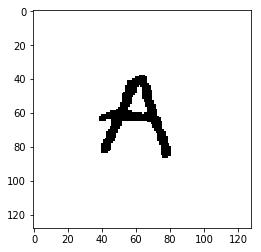

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


A  = "train/41_00000_0.png"
img = Image.open(A)
plt.imshow(img)

width, height = img.size
print("ファイル名：" + A + "　幅：" + str(width) + "　高さ：" + str(height))

### ラーニングセット

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
col_Names=["id", "label"]
train = pd.read_csv("train_after.csv",names=col_Names)

In [12]:
train[0:5]

,id,label
0,41_00000_0,0
1,41_00000_1,0
2,41_00000_2,0
3,41_00000_3,0
4,41_00000_4,0


In [13]:
train.shape

(81463, 2)

In [14]:
train

,id,label
0,41_00000_0,0
1,41_00000_1,0
2,41_00000_2,0
3,41_00000_3,0
4,41_00000_4,0
5,41_00000_5,0
6,41_00000_6,0
7,41_00001_0,0
8,41_00001_1,0
9,41_00001_2,0


#### 画像データをNumpy形式に変換
様子を確認するため 1つの画像で処理内容をチェック

In [15]:
train_image = []
for i in range(1):
    print(i)
    img = image.load_img('train/'+train['id'][i]+'.png', target_size=(28,28,1), grayscale=True)
    print("image.load_img: ")
    print(img)
    img = image.img_to_array(img)
    print("\n image.img_to_array: ")
    print(img)
    img = img/255
    print("\n img/255: ")
    print(img)
    train_image.append(img)

print("\n train_image: ")
print(train_image)

0
image.load_img: 
<PIL.Image.Image image mode=L size=28x28 at 0x7FC520609908>

 image.img_to_array: 
[[[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
  [255.]
 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


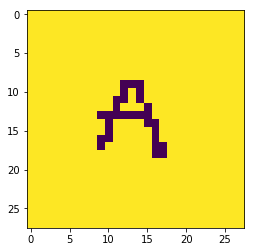

In [16]:
for i in range(1):
    img = image.load_img('train/'+train['id'][i]+'.png', target_size=(28,28,1), grayscale=True)
plt.imshow(img)

In [17]:
img.getcolors

<bound method Image.getcolors of <PIL.Image.Image image mode=L size=28x28 at 0x7FC520609208>>

In [18]:
import sys
sys.getsizeof(img)

56

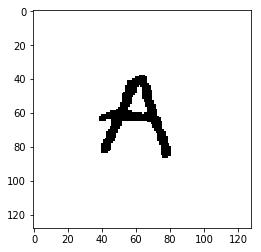

In [19]:
for i in range(1):
    img2 = image.load_img('train/'+train['id'][i]+'.png',  grayscale=False)
plt.imshow(img2)

In [20]:
img2.getcolors

<bound method Image.getcolors of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FC520609EB8>>

In [21]:
sys.getsizeof(img2)

56

In [22]:
img

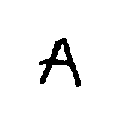

In [23]:
img2

In [24]:
print(type(train_image))
print("配列の次元： " + str(np.ndim(train_image)))

<class 'list'>
配列の次元： 4


In [25]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i]+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/81463 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 81463/81463 [00:46<00:00, 1770.70it/s]


In [26]:
print(type(X))
print(X.ndim)
print(X.shape)
print(X.size)

<class 'numpy.ndarray'>
4
(81463, 28, 28, 1)
63866992


In [27]:
X

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

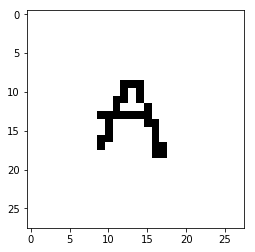

In [28]:
X_img = X[0].reshape((28, 28))
plt.imshow(X_img, cmap='gray')
plt.show()

## データセットを　学習用とテスト用に分ける

In [0]:
y=train['label'].values

In [30]:
print(y)
print(y.ndim)
print(y.shape)
print(y.size)

[ 0  0  0 ... 25 25 25]
1
(81463,)
81463


In [0]:
y = to_categorical(y)

In [32]:
print(y)
print(y.ndim)
print(y.shape)
print(y.size)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
2
(81463, 26)
2118038


In [33]:
y[0,]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
y[10000,]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [36]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

65170
16293
65170
16293


In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28, 1)
(None, 26)


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [40]:
fit = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 65170 samples, validate on 16293 samples
Epoch 1/20





65170/65170 [==============================] - 37s 568us/step - loss: 0.8597 - acc: 0.7437 - val_loss: 0.2717 - val_acc: 0.9207
Epoch 2/20
65170/65170 [==============================] - 29s 452us/step - loss: 0.4286 - acc: 0.8716 - val_loss: 0.2278 - val_acc: 0.9344
Epoch 3/20
65170/65170 [==============================] - 29s 452us/step - loss: 0.3513 - acc: 0.8949 - val_loss: 0.2029 - val_acc: 0.9409
Epoch 4/20
65170/65170 [==============================] - 29s 449us/step - loss: 0.3051 - acc: 0.9090 - val_loss: 0.1925 - val_acc: 0.9454
Epoch 5/20
65170/65170 [==============================] - 30s 454us/step - loss: 0.2694 - acc: 0.9196 - val_loss: 0.1778 - val_acc: 0.9499
Epoch 6/20
65170/65170 [==============================] - 30s 460us/step - loss: 0.2516 - acc: 0.9243 - val_loss: 0.1755 - val_acc: 0.9518
Epoch 7/20
651

### ラーニング結果の検証

In [41]:
score = model.evaluate(X_test, y_test, verbose=1)
print("ロス　" + str(score[0]))
print("精度　" + str(score[1]))

16293/16293 [==============================] - 2s 127us/step
ロス　0.17946668133819868
精度　0.956484379795004


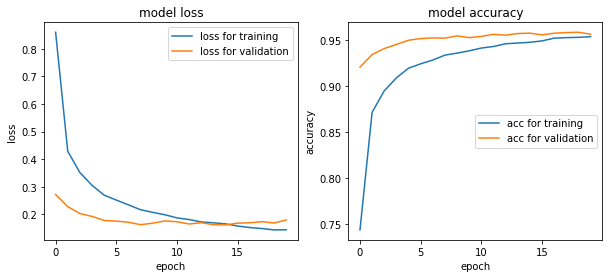

In [47]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
def plot_history_loss(hist):
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

def plot_history_acc(hist):
    axR.plot(fit.history['acc'],label="acc for training")
    axR.plot(fit.history['val_acc'],label="acc for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='right')

plot_history_loss(fit)
plot_history_acc(fit)

In [0]:
fit.history

In [0]:
model.save('ABCmodel.h5') 

### 自分の画像でテスト

In [48]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

test_model = load_model('ABCmodel.h5')
img = load_img('Y.png',target_size=(28,28,1), color_mode = "grayscale")
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = test_model.predict_classes(x)
prob = test_model.predict_proba(x)
print(preds)
print(prob)

[24]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]


In [52]:
type(preds)

numpy.ndarray

In [71]:
new_dir_list = [] 
new_dir_list_name = 'A'
for i in range(0, 26): 
    new_dir_list.append(new_dir_list_name) 
    new_dir_list_name = chr(ord(new_dir_list_name) + 1)

ABC = preds.tolist()
ABC = int(ABC[0])
print(new_dir_list[ABC])

Y


In [67]:
ABC

[24]

### h5 -> tflite Convert

In [0]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('ABCmodel.h5')
tflite_model = converter.convert()
open('ABC.tflite', 'wb').write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


4809820